In [2]:
#Katarzyna Stojek, Katarzyna Domańska

import sympy as sp
import numpy as np
sp.init_printing()
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.animation as animation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D 

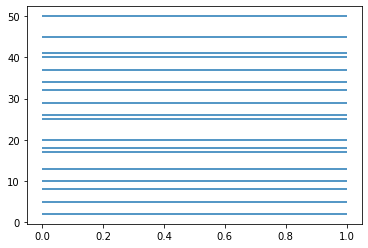

In [3]:
# Drabinka poziomów energetycznych
plt.hlines([2,5,8,10,13,17,18,20,25,26,29,32,34,37,40,41,45,50],0,1)

In [4]:
nx = sp.Symbol('n_x')
x = sp.Symbol('x')
a = sp.Symbol('a')
ny = sp.Symbol('n_y')
y = sp.Symbol('y')
b = sp.Symbol('b')
h = sp.Symbol('hbar')

nx, x, a, ny, y, b, h

In [11]:
def Psi(nx, x, ny, y, t, a = 1.0, b = 1.0, h = 1.0, m = 1.0):
    return np.sqrt(4.0 / a / b) * np.sin(nx * np.pi * x / a) * np.sin(ny * np.pi * y / b) * np.exp(-1j *  np.pi**2 * h / (2 * m) * (nx**2/a**2 + ny**2/b**2) * t)

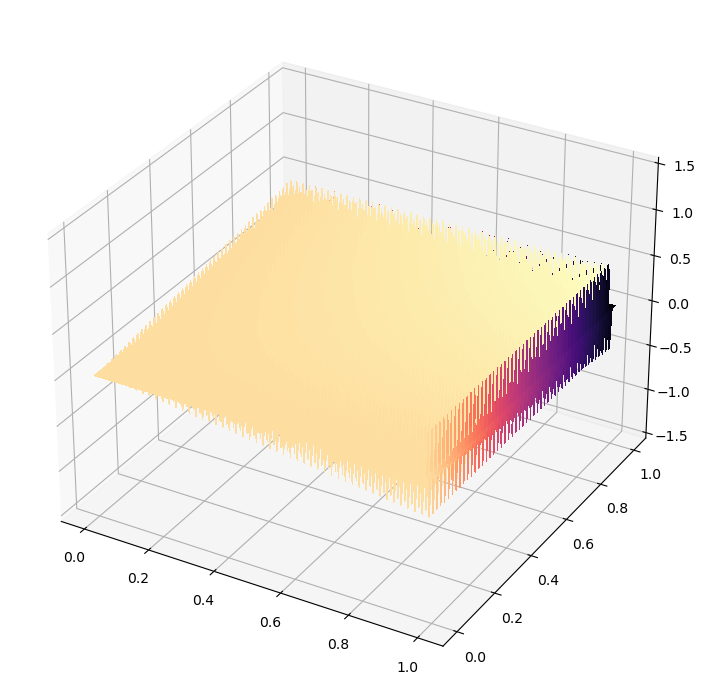

In [7]:
# Stany stacjonarne
nxx=100
nyy=100

xx = np.linspace(0,1,1000)
yy = np.linspace(0,1,1000)
X, Y = np.meshgrid(xx, yy)
t=np.linspace(0,20,1000)

fig = plt.figure(figsize=(9,9), dpi=100)
ax=fig.gca(projection = '3d')

def update(i):
    Z = np.real(Psi(nxx, X, nyy, Y, t[i]))
    ax.clear()
    # oś z
    ax.set_zlim(-1.5, 1.5)
    ax.plot_surface(X, Y, Z, cmap=cm.magma, linewidth=0, antialiased=False)

#ffmpeg

anim = animation.FuncAnimation(fig, update, np.arange(100), interval=80)
HTML(anim.to_html5_video())

#plt.show()

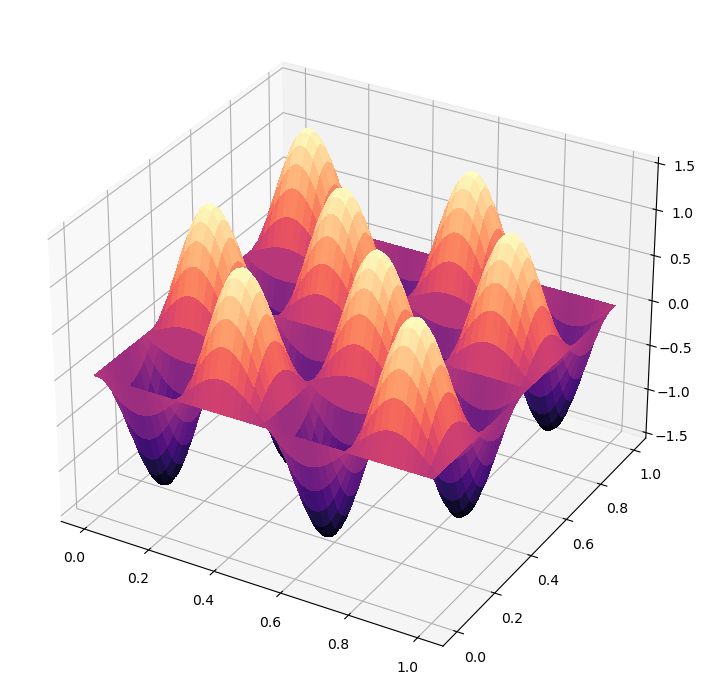

In [34]:
# Stany stacjonarne
nxx=4
nyy=4

xx = np.linspace(0,1,1000)
yy = np.linspace(0,1,1000)
X, Y = np.meshgrid(xx, yy)
t=np.linspace(0,20,1000)

fig = plt.figure(figsize=(9,9), dpi=100)
ax=fig.gca(projection = '3d')

def update(i):
    Z = np.imag(Psi(nxx, X, nyy, Y, t[i]))
    ax.clear()
    
    ax.set_zlim(-1.5, 1.5)
    ax.plot_surface(X, Y, Z, cmap=cm.magma, linewidth=0, antialiased=False)

#ffmpeg

anim = animation.FuncAnimation(fig, update, np.arange(100), interval=80)
HTML(anim.to_html5_video())

#plt.show()

In [12]:
def PsiSum(x, y, t, v, nl):
    zs = np.zeros_like(x, dtype = np.complex128)
    norm = np.sum(np.array([*nl.values()])**2)
    for w in v:
        norm+=w**2
    norma = np.sqrt(norm)
    ite = 0
    for n, l in nl.items():
        zs += v[ite] * Psi(n, x, l, y, t) / norma
        ite+=1
    return zs

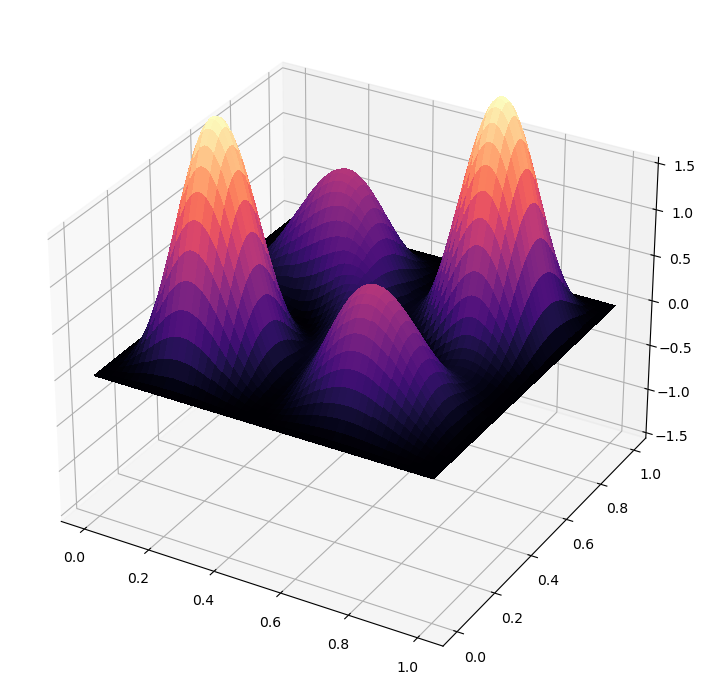

In [13]:
# Kombinacje liniowe
xx = np.linspace(0,1,1000)
yy = np.linspace(0,1,1000)
X, Y = np.meshgrid(xx, yy)
t=np.linspace(0,20,1000)

fig = plt.figure(figsize=(9,9), dpi=100)
ax=fig.gca(projection = '3d')

def update(i):
    Z = np.abs(PsiSum(X, Y, t[i], [1,2], {3:1,2:2}))**2
    ax.clear()
    
    ax.set_zlim(-1.5, 1.5)
    ax.plot_surface(X, Y, Z, cmap=cm.magma, linewidth=0, antialiased=False)

#ffmpeg

anim = animation.FuncAnimation(fig, update, np.arange(100), interval=80)
HTML(anim.to_html5_video())

#plt.show()